# Behaviorial Cloning Project

Load Images for training Data

In [2]:
#Import Libraries
import csv
import cv2
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Lambda, Dropout
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D as MaxPool
from keras.layers import Cropping2D as Crop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1:
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images = []
            steering = []
            for sample in batch_samples:
                source_path = sample[0]
                image = cv2.cvtColor(cv2.imread(source_path), cv2.COLOR_BGR2RGB)
                #image = cv2.imread(source_path)
                images.append(image)
                #flip it as well
                images.append(cv2.flip(image,1))
                steering.append(float(sample[3]))
                steering.append(float(sample[3])*-1.0)
            X_train = np.array(images)
            y_train = np.array(steering)
            yield sklearn.utils.shuffle(X_train, y_train)

In [3]:
#Load images
lines = []

with open('driving_log_custom.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
lines.pop(0)            
train_samples, validation_samples = train_test_split(lines, test_size=0.2)
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)




In [4]:
#create model - Nvidia
model = Sequential()
model.add(Crop(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: (x / 255.0) - 0.5))
model.add(Conv2D(24,5,5,subsample=(2,2), activation="relu"))
model.add(Conv2D(36,5,5,subsample=(2,2), activation="relu"))
model.add(Conv2D(48,5,5,subsample=(2,2), activation="relu"))
model.add(Conv2D(24,3,3, activation="relu"))
model.add(Conv2D(24,3,3, activation="relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1164))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
#history_object = model.fit(X_train,y_train,validation_split=0.2,shuffle=True,verbose=1,nb_epoch=3)

history_object = model.fit_generator(train_generator, samples_per_epoch=len(train_samples*2), 
                                     validation_data=validation_generator,
                                     nb_val_samples=len(validation_samples*2), nb_epoch=10,verbose=1)
#Save model

model.save('model.h5')


Epoch 1/10
58/58 [==============================] - 1s - loss: 0.1111 - val_loss: 0.8886
Epoch 2/10
58/58 [==============================] - 0s - loss: 0.8078 - val_loss: 0.1063
Epoch 3/10
58/58 [==============================] - 0s - loss: 0.0760 - val_loss: 0.1514
Epoch 4/10
58/58 [==============================] - 0s - loss: 0.1170 - val_loss: 0.1246
Epoch 5/10
58/58 [==============================] - 0s - loss: 0.0866 - val_loss: 0.1625
Epoch 6/10
58/58 [==============================] - 0s - loss: 0.1253 - val_loss: 0.1126
Epoch 7/10
58/58 [==============================] - 0s - loss: 0.0800 - val_loss: 0.1434
Epoch 8/10
58/58 [==============================] - 1s - loss: 0.1082 - val_loss: 0.1114
Epoch 9/10
58/58 [==============================] - 1s - loss: 0.0761 - val_loss: 0.0959
Epoch 10/10
58/58 [==============================] - 0s - loss: 0.0613 - val_loss: 0.1057


In [7]:
#Fine tune Model Here
if 'model' in globals():
 del model
model = load_model('model.h5')
lines_f = []

with open('driving_log_dusty.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines_f.append(line)
lines_f.pop(0)            
train_samples, validation_samples = train_test_split(lines_f, test_size=0.05)

train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

history_object = model.fit_generator(train_generator, samples_per_epoch=len(train_samples*2), 
                                     validation_data=validation_generator,
                                     nb_val_samples=len(validation_samples*2), nb_epoch=3,verbose=1)
#Save model

model.save('model.h5')

Epoch 1/3
1042/1042 [==============================] - 18s - loss: 0.0151 - val_loss: 0.0055
Epoch 2/3
1042/1042 [==============================] - 18s - loss: 0.0151 - val_loss: 0.0068
Epoch 3/3
1042/1042 [==============================] - 17s - loss: 0.0128 - val_loss: 0.0063


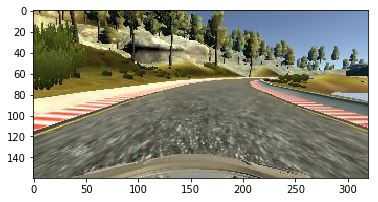

[[ 0.07976824]]
[[-0.06793877]]


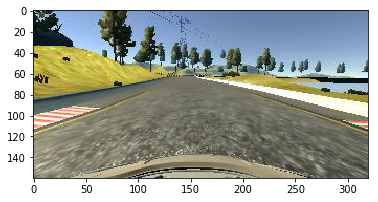

[[-0.03215916]]
[[ 0.00624264]]


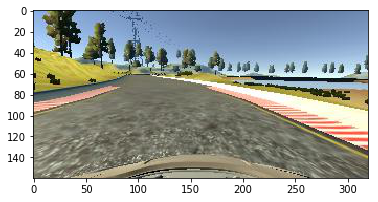

[[-0.09094337]]
[[ 0.14441086]]


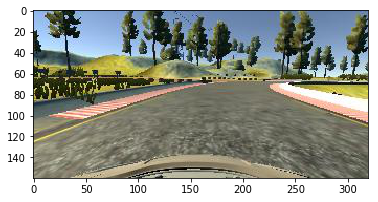

[[ 0.07973241]]
[[-0.09057506]]


In [5]:
#LENET MODEL
'''
model.add(Conv2D(6,5,5,activation="relu"))
model.add(MaxPool())
model.add(Conv2D(6,5,5,activation="relu"))
model.add(MaxPool())
model.add(Conv2D(6,5,5,activation="relu"))
model.add(MaxPool())
model.add(Conv2D(6,5,5,activation="relu"))
model.add(MaxPool())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))
'''
test_img=cv2.imread('IMG/center_2016_12_01_13_33_06_005.jpg')
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()
test_img2 = test_img[np.newaxis,:]
print(model.predict(test_img2))
print(model.predict((cv2.flip(test_img,1))[np.newaxis,:]))
test_img=cv2.imread('IMG/center_2016_12_01_13_38_10_291.jpg')
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()
test_img2 = test_img[np.newaxis,:]
print(model.predict(test_img2))
print(model.predict((cv2.flip(test_img,1))[np.newaxis,:]))
test_img=cv2.imread('IMG/center_2016_12_01_13_38_09_582.jpg')
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()
test_img2 = test_img[np.newaxis,:]
print(model.predict(test_img2))
print(model.predict((cv2.flip(test_img,1))[np.newaxis,:]))
test_img=cv2.imread('IMG/center_2016_12_01_13_38_16_582.jpg')
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.show()
test_img2 = test_img[np.newaxis,:]
print(model.predict(test_img2))
print(model.predict((cv2.flip(test_img,1))[np.newaxis,:]))

In [ ]:
#Plot The loss
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()